![](itd.png)

    
# Análisis de Datos Masivos
## Contador SQL de conexión a internet

## Nombree del docente
### José Gabriel Rodriguez Rivas
## Nombre del alumno
### Calos Alberto Carrete Gómez

##### Conectarse a la Base de Datos

In [1]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
conn = sqlite3.connect('InternetSpeed.db')

In [5]:
cur = conn.cursor()

In [26]:
query = "SELECT DateTime FROM LA_wifi_speed_UK limit 10"
cur.execute(query)

In [27]:
#Lo siguiente sera para ver el resultado
for row in cur:
    print(row)

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [28]:
#Esta es casi lo mismo que el código anterior, solamente que en esta ocasión estará arrojando resultados aleatorios
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10'
cur.execute(query)

for row in cur:
    print (row)

('2016-11-29 04:00:00.000000',)
('2016-12-01 03:00:00.000000',)
('2016-12-11 08:00:00.000000',)
('2016-11-25 12:30:00.000000',)
('2016-11-23 22:00:00.000000',)
('2016-12-01 01:30:00.000000',)
('2016-12-06 12:30:00.000000',)
('2016-11-30 09:30:00.000000',)
('2016-12-08 22:00:00.000000',)
('2016-12-10 17:30:00.000000',)


In [29]:
#Obtener el nombre de las primeras 10 columnas
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(query)
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [30]:
columns = [member[0] for member in cur.description]
#Ignora el índice de la columna
columns = columns[1:]

In [69]:
columns[:10] #Se imprimen solo los primeros 10 resultados de la columna para no saturar la visualización

['E08000015',
 'E07000068',
 'E08000025',
 'E07000177',
 'E08000023',
 'E07000073',
 'E07000051',
 'E06000006',
 'E09000020',
 'E07000192']

In [32]:
#Remueve el sufijo _p
columns = [c.replace('_p', '') for c in columns]
#Remueve el sufijo _d
columns = [c.replace('_d', '') for c in columns]
#Remueve el sufijo _u
columns = [c.replace('_u', '') for c in columns]
# Esta operación remueve duplicados
columns = list(set(columns))

In [33]:
columns[:10]

['E08000015',
 'E07000068',
 'E08000025',
 'E07000177',
 'E08000023',
 'E07000073',
 'E07000051',
 'E06000006',
 'E09000020',
 'E07000192']

In [34]:
area = columns[0]
print(area)

E08000015


In [35]:
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
print(suffix.keys())
print(suffix.values())



dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E08000015')

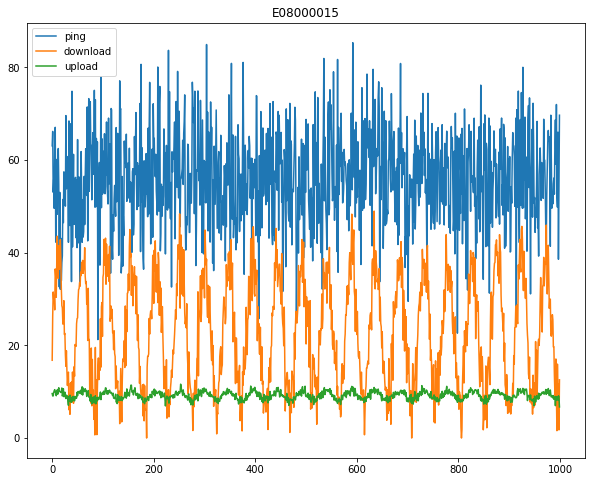

In [39]:
area = columns[0]
plt.figure(figsize=(10, 8))

# Plot each variable in suffix.keys() for each area
for s in suffix.keys():
    query = 'SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime'.format(area,s)
    
    cur.execute(query)
    plt.plot(list(cur.fetchall()), label=suffix[s])
plt.legend()
plt.title(area)

### Parte 2: Manipular datos con Panda

In [52]:
new_columns = ['Area','Ping_promedio','Descarga_promedio','Carga_promedio']

df = pd.DataFrame(columns = new_columns)

In [53]:
for i in range(len(columns)-1):
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        query = 'SELECT AVG("{}{}") FROM LA_wifi_speed_UK'.format(columns[i],s)
        cur.execute(query)
        
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    #Concatena con las columnas vacias del DataFrame
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
#Se visualizan los datos
df.head()


,Area,Ping_promedio,Descarga_promedio,Carga_promedio
0,E08000015,55.981296,22.945774,9.191282
1,E07000068,51.081755,20.521445,8.259839
2,E08000025,70.192955,29.853411,11.999448
3,E07000177,52.144336,21.355247,8.520925
4,E08000023,52.531300,21.366625,8.548282


In [54]:
len(df) #Longitud del dataframe

326

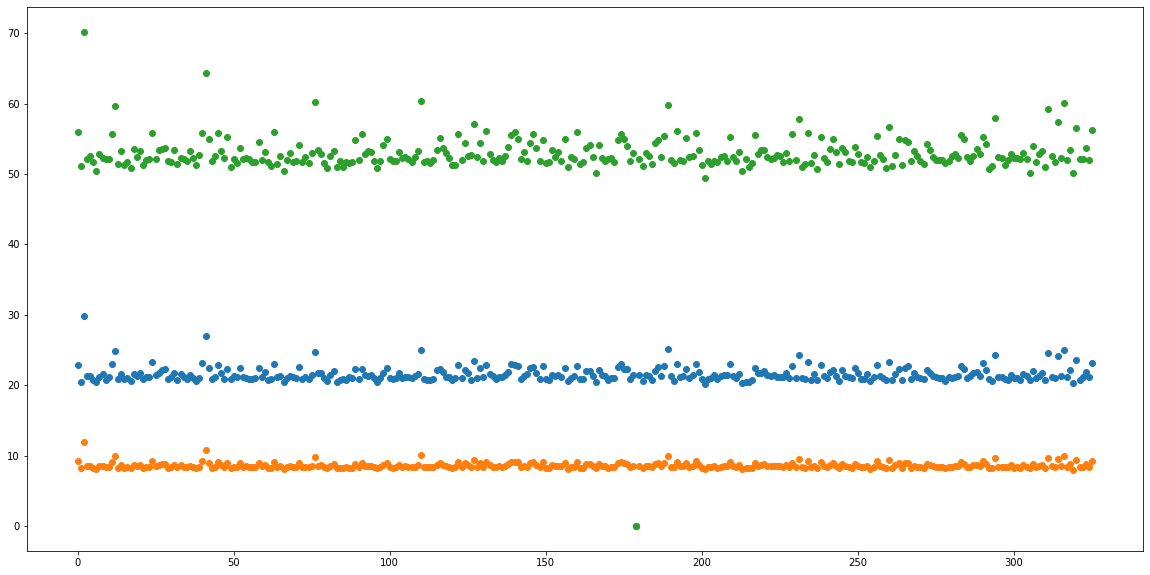

In [55]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df[['Descarga_promedio','Carga_promedio','Ping_promedio']], 'o')

In [58]:
#Se borra la tabla en caso de que esta exista
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass
df.to_sql('average_speed',conn)

In [59]:
#Lo siguiente es para verificar que todo este trabajando de manera correcta
query_2 = 'SELECT * FROM average_speed'
cur.execute(query_2)
print(cur.fetchone())
print(cur.fetchone())

(0, 'E08000015', 55.981296288661106, 22.94577378653411, 9.191282423459182)
(1, 'E07000068', 51.08175482535977, 20.52144537408581, 8.259838633680625)


### Parte 3: Una las tablas con Pandas

In [61]:

query = 'SELECT * FROM LA_population LIMIT 10'
cur.execute(query)
for row in cur:
    print(row)
    



('Aberdeen City', 'S12000033', 222793)
('Aberdeenshire', 'S12000034', 252973)
('Adur', 'E07000223', 61182)
('Allerdale', 'E07000026', 96422)
('Amber Valley', 'E07000032', 122309)
('Angus', 'S12000041', 115978)
('Antrim and Newtownabbey', 'N09000001', 138567)
('Ards and North Down', 'N09000011', 156672)
('Argyll and Bute', 'S12000035', 88166)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693)


In [62]:
query = 'SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area'

cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break
    print(row)
    
    k+=1


(0, 'E08000015', 55.981296288661106, 22.94577378653411, 9.191282423459182, 'Wirral', 'E08000015', 319783)
(1, 'E07000068', 51.08175482535977, 20.52144537408581, 8.259838633680625, 'Brentwood', 'E07000068', 73601)
(2, 'E08000025', 70.19295547285596, 29.853411162269314, 11.999447541819524, 'Birmingham', 'E08000025', 1073045)
(3, 'E07000177', 52.14433573394595, 21.35524679573192, 8.520924608542192, 'Cherwell', 'E07000177', 141868)
(4, 'E08000023', 52.53130022946711, 21.36662513821656, 8.548282096961298, 'South Tyneside', 'E08000023', 148127)
(5, 'E07000073', 51.7312779579503, 20.717082962625977, 8.303460354513895, 'Harlow', 'E07000073', 81944)
(6, 'E07000051', 50.48148519062136, 20.484920187181974, 8.152684886284439, 'Purbeck', 'E07000051', 44973)
(7, 'E06000006', 52.87808994206384, 21.2387035397305, 8.480249236836627, 'Halton', 'E06000006', 125746)
(8, 'E09000020', 52.33465011744406, 21.60596353839832, 8.564116178479612, 'Kensington and Chelsea', 'E09000020', 158649)
(9, 'E07000192', 52.